In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import locale
import os
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split


In [17]:
df = pd.read_csv('labeled_set_abnbLag12_zLag6_monPred6.csv')
df = df.drop(['Unnamed: 0'],axis = 1)

In [18]:
def convert_regression_ys_to_classes(y_vals, y_class_cutoffs, y_classes):
    new_y_vals = []
    for y in y_vals:
        for i, c in enumerate(y_class_cutoffs):
            if y < c:
                new_y_vals.append(y_classes[i])
                break 
    return new_y_vals

In [19]:
z_lag = 6
y_class_cutoffs = [0.03*z_lag/12, 1]
y_classes = [0,1]
dates = sorted(list(set(df.loc[:,'Months_Since_Jan_2010'])))
test_date = dates[-3]
test_set = df.loc[df['Months_Since_Jan_2010']>= test_date]
train_set = df.loc[df['Months_Since_Jan_2010']< test_date]
train_y = np.array(train_set.loc[:,'y'])
train_x = np.array(train_set.drop(['y'],axis = 1))
train_y = convert_regression_ys_to_classes(train_y, y_class_cutoffs, y_classes)
test_y = np.array(test_set.loc[:,'y'])
test_x = np.array(test_set.drop(['y'],axis = 1))
test_y = convert_regression_ys_to_classes(test_y, y_class_cutoffs, y_classes)
print("Train length: ", len(train_x))
print("Test length: ", len(test_x))
len(train_x)+len(test_x)


Train length:  1494
Test length:  273


1767

In [90]:
#normalize features for use in clustering
df_norm = pd.read_csv('labeled_set_abnbLag12_zLag6_monPred6.csv')
df_norm = df_norm.drop(['Unnamed: 0'],axis = 1)


z_lag = 6
y_class_cutoffs = [0.03*z_lag/12, 1]
y_classes = [0,1]

full_y = np.array(df_norm.loc[:,'y'])
full_y_class = convert_regression_ys_to_classes(full_y, y_class_cutoffs, y_classes)


for col in df_norm.columns:
    minC, maxC = min(df_norm.loc[:,col]), max(df_norm.loc[:,col])
    normC = (df_norm.loc[:,col] - minC) / (maxC - minC)
    df_norm.loc[:,col] = normC

normalized_x = np.array(df_norm.drop(['Number_of_Bedrooms','Months_Since_Jan_2010', 'y'], axis = 1))

In [136]:
H_cluster = AgglomerativeClustering(n_clusters = 2)
y_cluster_label = H_cluster.fit_predict(normalized_x)
#print(H_cluster.labels_)


num_1 = np.count_nonzero(y_cluster_label)
num_0 = len(y_cluster_label)-num_1

print(num_1, num_0)

435 1332


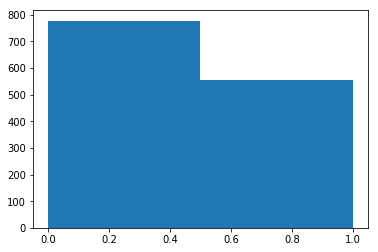

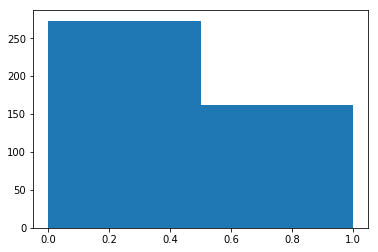

In [137]:
y_0 = [] #all points labeled 0 by the clustering algorithm
y_1 = [] #all points labeled 1 by the clustering algorithm

for y_norm, y_class in zip(y_cluster_label, full_y_class):
    if y_norm == 0:
        y_0.append(y_class)
    else:
        y_1.append(y_class)

            
plt.hist(y_0, bins=2)
plt.show()
plt.hist(y_1, bins = 2)
plt.show()

In [13]:
print(df.columns)
print(len(x[0]))

Index(['Number_of_Bedrooms', 'Months_Since_Jan_2010',
       'Relative_of_Listings_Consistent_Between_Years',
       'Relative_Change_in_Number_of_Listings',
       'Relative_Change_in_Median_Price', 'Relative_Change_in_Adjusted_Price',
       'Relative_Change_in_Difference_Between_Listed_and_Adjusted_Price',
       'Change_in_Fraction_of_Listings_with_Weekly_or_Monthly_Prices',
       'Relative_Change_in_Fraction_of_Professional_Listings',
       'Relative_Change_in_Average_Age_of_listings',
       'Relative_Change_in_Mean_Description_Length',
       'Relative_Change_in_Fraction_of_Hosts_that_are_Superhosts',
       'minimum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'number_of_reviews',
      